# Make a stacked barplot of amino acid counts

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Summary data

We're going to use the summary dataset which filters only the "interesting" sites in the TMPRSS2 sequence.

This data file is in *long* format, and we will need to reshape it to *wide* format to make some data operations easier.

In [2]:
summary = pd.read_csv('../data/proc/resi_prop_delta_summary.csv')

In [3]:
summary.head()

,Unnamed: 0,iso2_zero_idx,is_interesting,resi_reference,resi_compare,is_deletion,pka_delta,mass_delta,occurrence_delta,percent_buried_delta,buried_vol_delta,vdw_delta,accessible_delta,hydrophobicity_delta,iso1_one_idx,species
0,149,149,True,C,C,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,Homo sapiens
1,156,156,True,C,C,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,Homo sapiens
2,162,162,True,C,C,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0,Homo sapiens
3,169,169,True,C,C,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,Homo sapiens
4,175,175,True,C,C,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,Homo sapiens


In [4]:
summary_wide = summary.pivot(index='iso1_one_idx', columns='species', values='resi_compare')

In [5]:
summary_wide

species,Bos taurus,Canis lupus familiaris,Equus caballus,Felis catus,Gallus gallus,Homo sapiens,Mus musculus
iso1_one_idx,,,,,,,
113.0,C,H,C,H,C,C,C
120.0,C,P,C,P,C,C,C
126.0,C,C,C,C,C,C,C
133.0,C,C,C,C,C,C,C
139.0,C,C,C,C,C,C,C
148.0,C,C,C,C,C,C,C
172.0,C,C,C,C,C,C,C
185.0,C,C,C,C,C,C,C
223.0,K,-,K,-,K,K,K


In [6]:
summary_wide.reset_index()

species,iso1_one_idx,Bos taurus,Canis lupus familiaris,Equus caballus,Felis catus,Gallus gallus,Homo sapiens,Mus musculus
0,113.0,C,H,C,H,C,C,C
1,120.0,C,P,C,P,C,C,C
2,126.0,C,C,C,C,C,C,C
3,133.0,C,C,C,C,C,C,C
4,139.0,C,C,C,C,C,C,C
5,148.0,C,C,C,C,C,C,C
6,172.0,C,C,C,C,C,C,C
7,185.0,C,C,C,C,C,C,C
8,223.0,K,-,K,-,K,K,K
9,224.0,K,S,K,S,R,K,K


Get a list of all the amino acid codes present using the `numpy.flatten()` method for Pandas dataframes:

In [7]:
summary_wide.values

array([['C', 'H', 'C', 'H', 'C', 'C', 'C'],
       ['C', 'P', 'C', 'P', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['K', '-', 'K', '-', 'K', 'K', 'K'],
       ['K', 'S', 'K', 'S', 'R', 'K', 'K'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['H', 'H', 'H', 'H', 'H', 'H', 'H'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['D', 'D', 'D', 'D', 'D', 'D', 'D'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['D', 'D', 'D', 'D', 'D', 'D', 'D'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['S', 'S', 'S', 'S', 'S',

In [8]:
summary_wide.values.flatten()

array(['C', 'H', 'C', 'H', 'C', 'C', 'C', 'C', 'P', 'C', 'P', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'K', '-', 'K', '-', 'K', 'K', 'K', 'K', 'S',
       'K', 'S', 'R', 'K', 'K', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C'],
      dtype=object)

In [9]:
aa_codes = set(summary_wide.values.flatten())
aa_codes

{'-', 'C', 'D', 'H', 'K', 'P', 'R', 'S'}

In [10]:
aa_dict = {aa: [] for aa in aa_codes}

In [11]:
aa_dict

{'R': [], 'C': [], '-': [], 'H': [], 'S': [], 'D': [], 'K': [], 'P': []}

In [12]:
for i, row in summary_wide.iterrows():
    row_data = list(row.values) # list instead of numpy array
    for aa in aa_codes:
        if aa in row_data:
            count = row_data.count(aa)
            aa_dict[aa].append(count)
        else:
            aa_dict[aa].append(0.0)

In [13]:
for key, val in aa_dict.items():
    summary_wide[key] = val

In [14]:
summary_wide.reset_index()

species,iso1_one_idx,Bos taurus,Canis lupus familiaris,Equus caballus,Felis catus,Gallus gallus,Homo sapiens,Mus musculus,R,C,-,H,S,D,K,P
0,113.0,C,H,C,H,C,C,C,0.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0
1,120.0,C,P,C,P,C,C,C,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0
2,126.0,C,C,C,C,C,C,C,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3,133.0,C,C,C,C,C,C,C,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,139.0,C,C,C,C,C,C,C,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
5,148.0,C,C,C,C,C,C,C,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
6,172.0,C,C,C,C,C,C,C,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
7,185.0,C,C,C,C,C,C,C,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
8,223.0,K,-,K,-,K,K,K,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0
9,224.0,K,S,K,S,R,K,K,1.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0


In [15]:
summary_wide[list(aa_codes)]

species,R,C,-,H,S,D,K,P
iso1_one_idx,,,,,,,,
113.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0
120.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0
126.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
133.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
139.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
148.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
172.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
185.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
223.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0


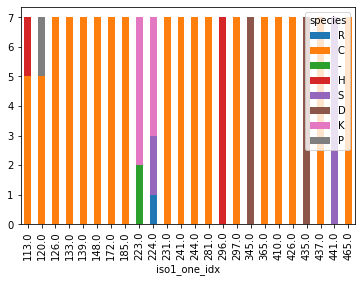

In [16]:
summary_wide[aa_codes].plot.bar(stacked=True)